# SI 618: Data Manipulation and Analysis
## Data analysis II: ANOVA, t-test, linear models, time series analysis

Note: Some slides from Dr. Teplovs


## Visualization for Data Scientists

We're going to revisit [a brief (8-minute video) by Dr. Chris Brooks](
https://www.coursera.org/learn/python-plotting/lecture/qrqqa/tools-for-thinking-about-design-alberto-cairo)


### Q1a: As someone who is studying data science, who are you trying to reach through your visualizations? 


### Q1b: What sense can you make of this image? What are some positive aspects and which aspects might make it harder to interpret?
![](resources/BrooksResearch.png)



## Returning to Seaborn: 

https://seaborn.pydata.org/examples/index.html

Take a look at the different visualizations that are possible.

### Q2a: Provide the title, description, and URL of one of the visualizations that you find particularly interesting and explain why you find it interesting.  

### Q2b: Given what we learned from Prof. Brooks, indicate 1-3 axes from Cairo's Visual Wheel where your chosen Seaborn visualization would likely score highly. Explain why.

![](resources/CairoVisualWheel.png)

## Part 2: Wine quality
![](resources/vinho.png)
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/home

## The Wine dataset

Some variables in this dataset are:
1. Alcohol: the amount of alcohol in wine
2. Volatile acidity: are high acetic acid in wine which leads to an unpleasant vinegar taste
3. Sulphates: a wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant
4. Citric Acid: acts as a preservative to increase acidity (small quantities add freshness and flavor to wines)
5. Total Sulfur Dioxide: is the amount of free + bound forms of SO2
6. Density: sweeter wines have a higher density
7. Chlorides: the amount of salt in the wine
8. Fixed acidity: are non-volatile acids that do not evaporate readily
9. pH: the level of acidity
10. Free Sulfur Dioxide: it prevents microbial growth and the oxidation of wine
11. Residual sugar: is the amount of sugar remaining after fermentation stops. The key is to have a perfect balance between — sweetness and sourness (wines > 45g/ltrs are sweet)
12. Quality: quality of the wine

Now let's start analyzing it

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
wine = pd.read_csv('data/winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Let's start examining quality

In [3]:
wine['isgood'] = np.where(wine['quality'] > 5, 'good','bad')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,isgood
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,bad


##### Lets create a pairplot for the wine dataset that plots 'good' and 'bad' wines in different hues. What are some interesting patterns?

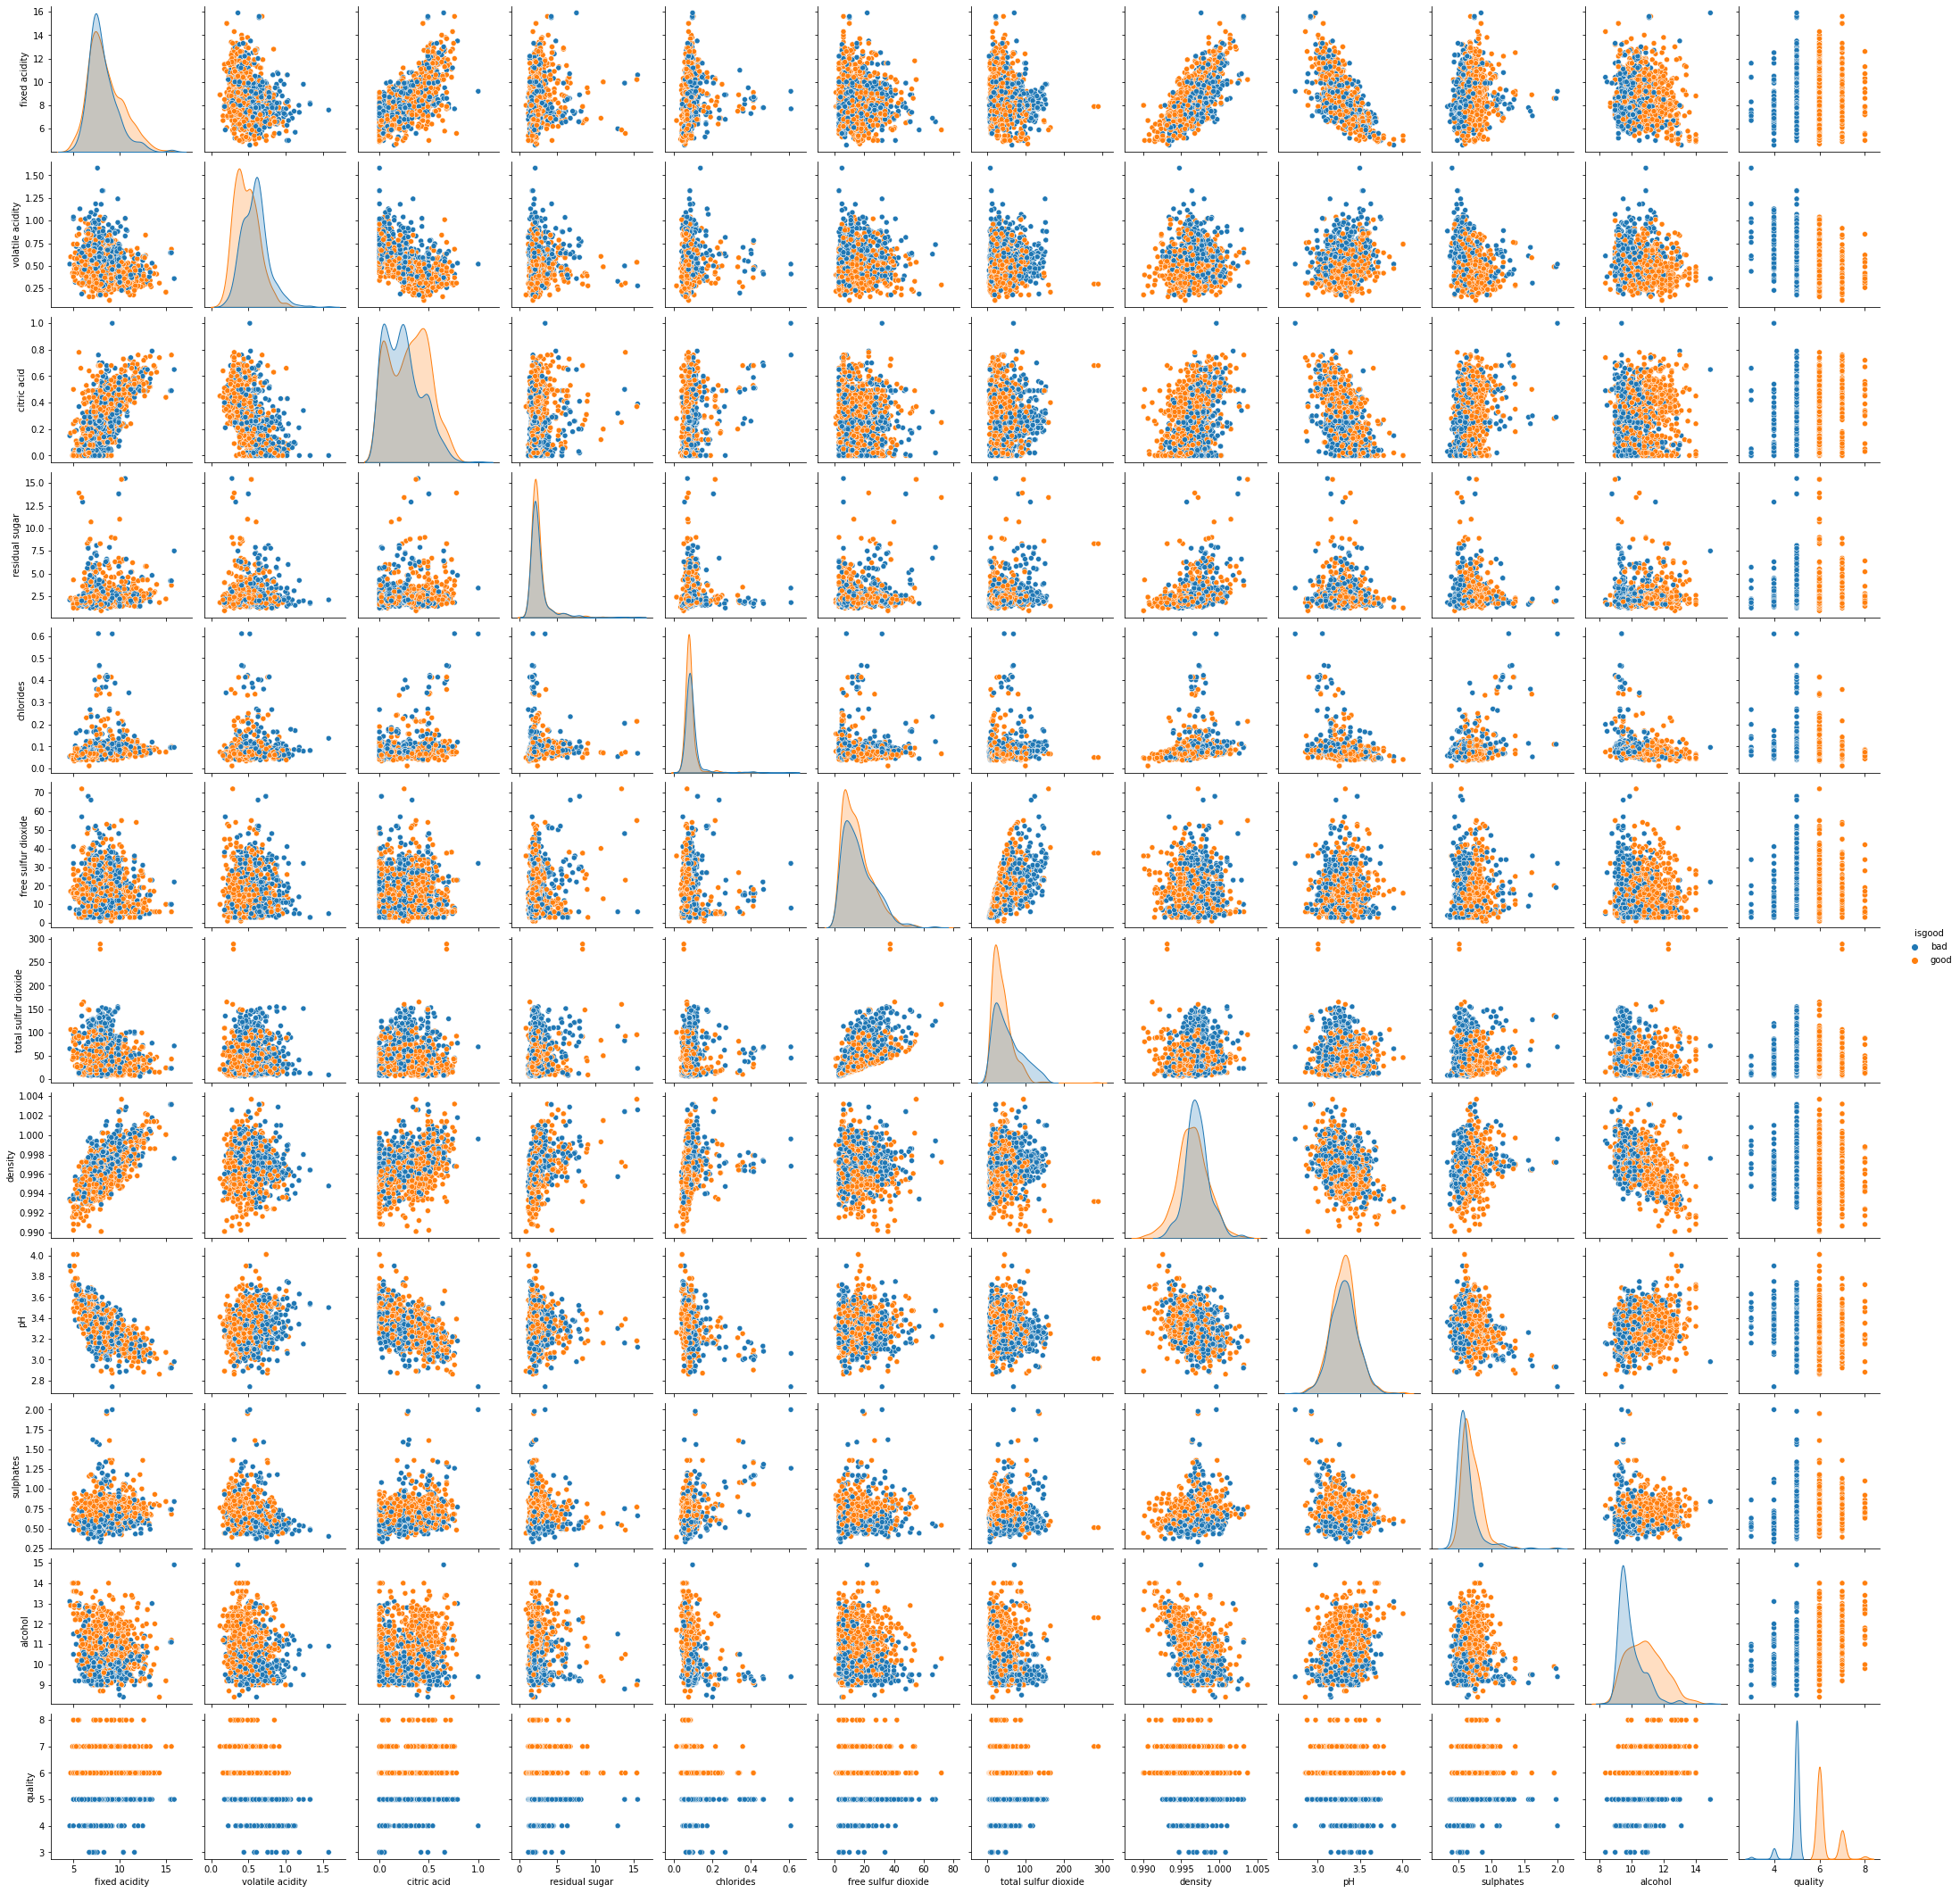

In [4]:
sns.pairplot(wine,hue="isgood")

#### Note that you might want to select columns to exclude to make this more readable. This certainly is high on density according to Cairo's wheel...

## T-test

A t-test is a simple statistical model that's commonly used to test whether the means of two different
distributions are the same.  scipy.stats gives us a handy interface for this:

In [5]:
goodwines = wine.query('isgood == "good"')
badwines = wine.query('isgood == "bad"')

In [6]:
from scipy import stats
stats.ttest_ind(wine[wine.isgood == 'good']['fixed acidity'],wine[wine.isgood == 'bad']['fixed acidity'])

Ttest_indResult(statistic=3.817471367791021, pvalue=0.00013997664808333373)

## Modeling -- Ordinary Least Squares (OLS) Regression + ANOVA

### What is a model? 
* A model family describes what kind of connection might exist between variables
  * e.g. A linear model predicts a single continuous response to a linear combination of predictor vars + Gaussian noise
  * Specified by the data miner/statistician
* A fitted model is an instance of a model family that has had its parameters estimated from data
  * Fitted model can make predictions on future data
  * Fitted to minimize model prediction error on the data
  * e.g.  Linear model minimizes total squared deviation between responses and predictions

We will focus on regression. Varioous libraries help you do this. We will rely on statsmodels since we can get a lot more detail about the regression model by using statsmodels

In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

statsmodels.formula.api allows you to use R-Style formulas: y ~ x1 + x2 + x3 + ...

1. y represents the outcome/dependent variable
2. x1, x2, x3, etc represent explanatory/independent variables 

In [8]:
model1 = smf.ols('chlorides ~ sulphates', data=wine).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              chlorides   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     255.3
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           1.99e-53
Time:                        10:32:42   Log-Likelihood:                 2737.1
No. Observations:                1599   AIC:                            -5470.
Df Residuals:                    1597   BIC:                            -5459.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0196      0.004      4.475      0.000       0.011       0.028
sulphates      0.1031      0.006     15.978      0.000       0.090       0.116
==============================================================================
Omnibus:                     1419.606   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51655.663
Skew:                           4.079   Prob(JB):                         0.00
Kurtosis:                      29.622   Cond. No.                         8.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

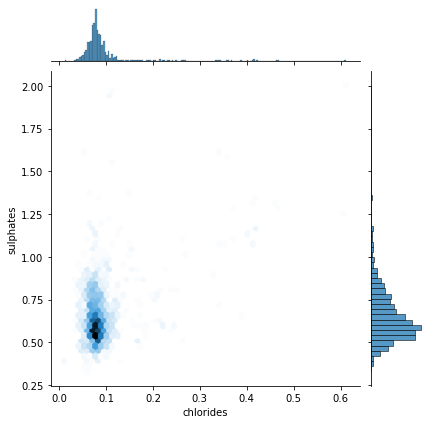

In [9]:
# A linear model makes important simplifications. Let's see how the two variables co-vary
sns.jointplot(x='chlorides',y='sulphates',data=wine,kind="hex")

### Let's see what happens when we use OLS to do an ANOVA


ANOVA (Analysis of Variance) test used to compare the means of more than 2 groups (generalization of t-test which can be used to compare 2 groups)

In [10]:
model2 = smf.ols('chlorides ~ C(isgood)', data=wine).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              chlorides   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     19.38
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           1.14e-05
Time:                        10:32:42   Log-Likelihood:                 2628.2
No. Observations:                1599   AIC:                            -5252.
Df Residuals:                    1597   BIC:                            -5242.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0930      0.002     54.200      0.000       0.090       0.096
C(isgood)[T.good]    -0.0103      0.002     -4.402      0.000      -0.015      -0.006
==============================================================================
Omnibus:                     1776.944   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           121109.713
Skew:                           5.649   Prob(JB):                         0.00
Kurtosis:                      44.111   Cond. No.                         2.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### How to read an ANOVA table? 
The ANOVA table represents degree of freedoms, the sum of squares (SS). The total variation is the sum of between- and within-group variances. The F value is a ratio of between- and within-group mean squares (MS). p value is estimated from F value and degree of freedoms.

You can see the typ argument: this determines how the sum of squares are computed (for more: https://md.psych.bio.uni-goettingen.de/mv/unit/lm_cat/lm_cat_unbal_ss_explained.html). Here we are testing main effects and 

In [11]:
aov_table = sm.stats.anova_lm(model2, typ=2)
print(aov_table)

             sum_sq      df          F    PR(>F)
C(isgood)  0.042438     1.0  19.378659  0.000011
Residual   3.497360  1597.0        NaN       NaN


### We might want to experiment with the original ```quality``` variable, either in a regression model:

In [12]:
model3 = smf.ols('chlorides ~ quality', data=wine).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              chlorides   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     26.99
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           2.31e-07
Time:                        10:32:42   Log-Likelihood:                 2631.9
No. Observations:                1599   AIC:                            -5260.
Df Residuals:                    1597   BIC:                            -5249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1298      0.008     15.765      0.000       0.114       0.146
quality       -0.0075      0.001     -5.195      0.000      -0.010      -0.005
==============================================================================
Omnibus:                     1776.366   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           120907.596
Skew:                           5.646   Prob(JB):                         0.00
Kurtosis:                      44.076   Cond. No.                         41.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### or in an ANOVA:

In [13]:
model4 = smf.ols('chlorides ~ C(quality)', data=wine).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              chlorides   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     6.036
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           1.53e-05
Time:                        10:32:42   Log-Likelihood:                 2633.5
No. Observations:                1599   AIC:                            -5255.
Df Residuals:                    1593   BIC:                            -5223.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1225      0.015      8.295      0.000       0.094       0.151
C(quality)[T.4]    -0.0318      0.016     -1.976      0.048      -0.063      -0.000
C(quality)[T.5]    -0.0298      0.015     -2.001      0.046      -0.059      -0.001
C(quality)[T.6]    -0.0375      0.015     -2.523      0.012      -0.067      -0.008
C(quality)[T.7]    -0.0459      0.015     -3.034      0.002      -0.076      -0.016
C(quality)[T.8]    -0.0541      0.018     -2.935      0.003      -0.090      -0.018
==============================================================================
Omnibus:                     1784.926   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           124552.412
Skew:                           5.683   Prob(JB):                         0.00
Kurtosis:                      44.717   Cond. No.                         36.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
aov_table = sm.stats.anova_lm(model4, typ=2)
print(aov_table)

              sum_sq      df         F    PR(>F)
C(quality)  0.065812     5.0  6.035639  0.000015
Residual    3.473986  1593.0       NaN       NaN


### Modeling assumptions

There are important assumptions embedded in models (e.g. linear relationship, multivariate normality, no autocorrelation, ... for OLS). 

It is important to check whether these assumptions hold to improve your models. We covered some in earlier lectures. Here I will mention one way to check for quality: Residuals

* Like a magnifying glass on a local area
* Errors are  supposed to be random: any patterns are interesting to find

## Part 3:  Airplane Crashes and Fatalities
The next dataset we are going to look at is the full history of airplane crashes throughout the world, from 1908-2009.  It's taken from:

https://opendata.socrata.com/Government/Airplane-Crashes-and-Fatalities-Since-1908/q2te-8cvq

In [15]:
import pandas as pd
import seaborn as sns

We've provided the CSV file for this lab so you can go ahead and load it in the usual way:

In [16]:
crashes = pd.read_csv('data/Airplane_Crashes_and_Fatalities_Since_1908.csv')

As always, you should take a look at the data to get a sense of 
what it's like:

In [17]:
crashes.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


### How do different aspects of airline crashes change over time?

Pandas is really good at helping
us deal with dates.  The 'Date' column in the dataframe contains 
strings that look like dates.  We can use the ```pandas.to_datetime()``` function to convert the strings to an internal datetime object
(see https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html for more details):

In [18]:
crashes['Date'] = pd.to_datetime(crashes['Date'])

And let's look at the dataframe again.  See any difference?

In [19]:
crashes.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


The pandas datetime object makes it easy to extract interesting 
parts of the date or time.  In our case, we're interested in extracting
the year, so we can do that with the following code:

In [20]:
crashes['year'] = crashes['Date'].dt.year

And, as always, let's look at what we got:

In [21]:
crashes.year.head()

0    1908
1    1912
2    1913
3    1913
4    1913
Name: year, dtype: int64

Let's create a visualization of the number of Fatalities per year:

<AxesSubplot:xlabel='year', ylabel='Fatalities'>

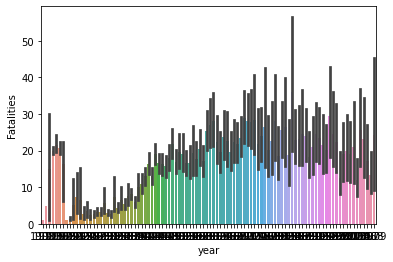

In [22]:
sns.barplot(x='year',y='Fatalities',data=crashes)

### That doesn't look great, does it? What can  we do to make this more readable? 

### Let's create a barplot of the number of fatalities per decade and describe the results. 

Let's go ahead and create a new column called 'decade' 
that represents the decade for each year.  Remember that an integer divide (a.k.a. a floor divide) can be
done with the // operator.

What's the trend in airplane crash fatalities?

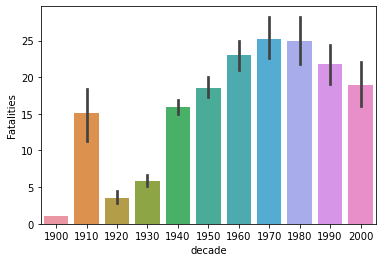

In [23]:
crashes['decade'] = (crashes['year'] // 10) * 10
g = sns.barplot(x='decade',y='Fatalities',data=crashes)

### Let's try modeling the relationship

In [24]:
model5 = smf.ols('Fatalities ~ C(decade)', data=crashes).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Fatalities   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     16.20
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           3.86e-29
Time:                        10:32:47   Log-Likelihood:                -25787.
No. Observations:                5256   AIC:                         5.160e+04
Df Residuals:                    5245   BIC:                         5.167e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.0000     32.730      0.031      0.976     -63.165      65.165
C(decade)[T.1910]    14.0769     33.354      0.422      0.673     -51.310      79.464
C(decade)[T.1920]     2.5562     32.822      0.078      0.938     -61.788      66.901
C(decade)[T.1930]     4.7781     32.781      0.146      0.884     -59.487      69.043
C(decade)[T.1940]    14.9264     32.763      0.456      0.649     -49.302      79.155
C(decade)[T.1950]    17.5554     32.758      0.536      0.592     -46.663      81.774
C(decade)[T.1960]    22.0499     32.753      0.673      0.501     -42.159      86.259
C(decade)[T.1970]    24.2401     32.750      0.740      0.459     -39.963      88.443
C(decade)[T.1980]    23.9149     32.753      0.730      0.465     -40.294      88.124
C(decade)[T.1990]    20.7845     32.751      0.635      0.526     -43.421      84.990
C(decade)[T.2000]    17.9725     32.758      0.549      0.583     -46.247      82.192
==============================================================================
Omnibus:                     5350.872   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           433561.948
Skew:                           4.921   Prob(JB):                         0.00
Kurtosis:                      46.392   Cond. No.                         255.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### <font color="magenta"> You can consider other models (maybe a quadratic? linear doesnt seem like it would work too well), as well as removing outliers (we will cover this in future classes). But you can already gain a lot of insights from the visualizations that summarize your data...

## Part 4: Texas Housing Prices

* For each metropolitan area in Texas (45 cities)
* For each month 2000-2009  (112 months)
  * Number of houses listed and sold
  * Total value of houses and average sale price
  * Average time on the market

Strategy:  
* Start with a single city (Houston)
* Explore patterns and fit models
* See how the models apply to all cities

In [25]:
houses = pd.read_csv('data/tx-house-sales.csv')
houses.head()

,city,sales,volume,avgprice,listings,onmarket,month,year,date
0,Abilene,72.0,5380000.0,74700.0,701.0,6.3,1,2000,2000.000000
1,Abilene,98.0,6505000.0,66400.0,746.0,6.6,2,2000,2000.083333
2,Abilene,130.0,9285000.0,71400.0,784.0,6.8,3,2000,2000.166667
3,Abilene,98.0,9730000.0,99300.0,785.0,6.9,4,2000,2000.250000
4,Abilene,141.0,10590000.0,75100.0,794.0,6.8,5,2000,2000.333333


In [26]:
# Lets first focus only oh Houston
houston = houses[houses['city'] == "Houston"]
houston.head()

,city,sales,volume,avgprice,listings,onmarket,month,year,date
2128,Houston,2653.0,381805283.0,143900.0,16768.0,3.9,1,2000,2000.000000
2129,Houston,3687.0,536456803.0,145500.0,16933.0,3.9,2,2000,2000.083333
2130,Houston,4733.0,709112659.0,149800.0,17058.0,3.9,3,2000,2000.166667
2131,Houston,4364.0,649712779.0,148900.0,17716.0,4.1,4,2000,2000.250000
2132,Houston,5215.0,809459231.0,155200.0,18461.0,4.2,5,2000,2000.333333


## Before we start analyzing this data, a digression: Plotnine

Plotnine (https://plotnine.readthedocs.io/en/stable/) provides a grammar of graphics in Python. The grammar is based on the ne originally introoduced in ggplot2 (R library). The grammar allows you to easily move from simple graphs to more complicated ones by simply adding grammar in a layered way.

This doesnt come with the standard python installation and needs to be installed (pip install plotnine). Let's see plotnine in action:

In [27]:
! pip install plotnine

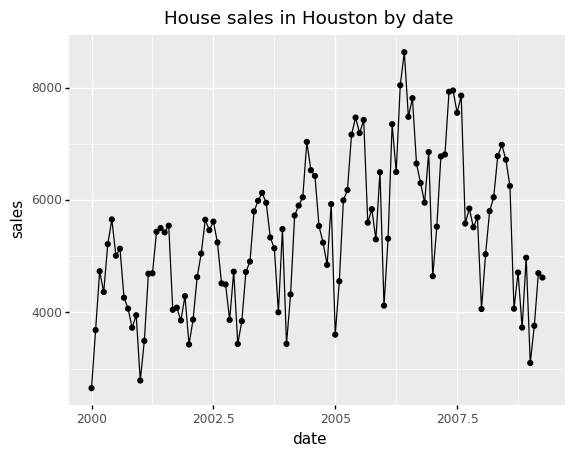

<ggplot: (130926077874)>

In [28]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_line, ggtitle

(ggplot(houston, aes('date', 'sales'))) + geom_point() + geom_line() \
+ ggtitle("House sales in Houston by date")

The main ggplot part specifies which data to use and which columns of that data are used for what purposes.

As noted before, plotnine graphics are built step by step by adding new elements adding different elements on top of each other using the + operator. You can see that we added the points and line using (+) for instance. 

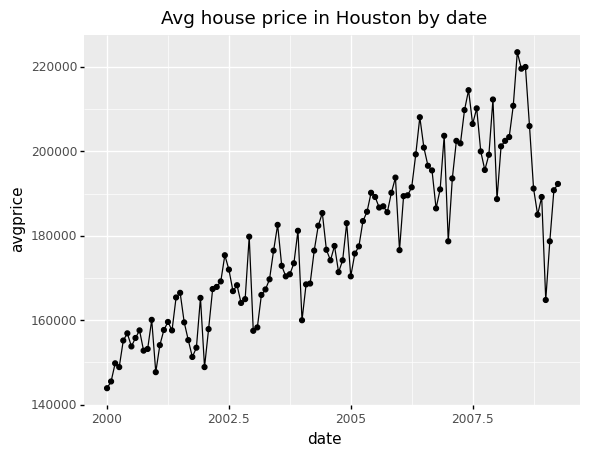

<ggplot: (130908270044)>

In [29]:
# Let's plot average house price
(ggplot(houston, aes('date', 'avgprice'))) + geom_point() + geom_line() \
+ ggtitle("Avg house price in Houston by date")

D:\Software\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


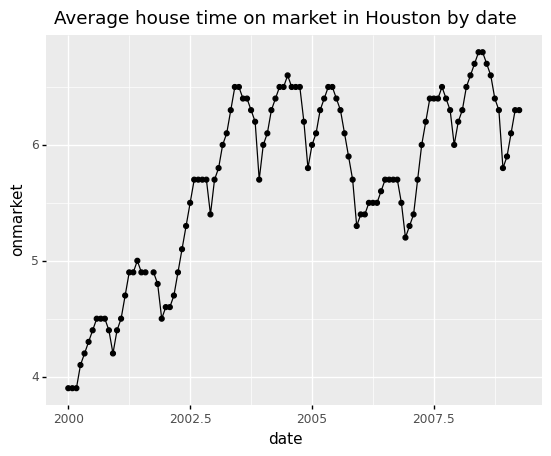

<ggplot: (130908205888)>

In [30]:
#And days on market
(ggplot(houston, aes('date', 'onmarket'))) + geom_point() + geom_line() \
+ ggtitle("Average house time on market in Houston by date")

# Basic Time Series Analysis

Seasonal variations make it harder to see long-term trends and interesting short-term events. How can we remove seasonal variation in the data?

* Understanding the relationship of present values of a time-varying variable with past or future values of the same variable.
* Correlated observations in time series:
  * Global trends
  * Seasonal or periodic patterns

* Simple way of looking for seasonal variation:
  * Group by year, plot with x-axis = month

In [32]:
houston

,city,sales,volume,avgprice,listings,onmarket,month,year,date
2128,Houston,2653.0,381805283.0,143900.0,16768.0,3.9,1,2000,2000.000000
2129,Houston,3687.0,536456803.0,145500.0,16933.0,3.9,2,2000,2000.083333
2130,Houston,4733.0,709112659.0,149800.0,17058.0,3.9,3,2000,2000.166667
2131,Houston,4364.0,649712779.0,148900.0,17716.0,4.1,4,2000,2000.250000
2132,Houston,5215.0,809459231.0,155200.0,18461.0,4.2,5,2000,2000.333333
...,...,...,...,...,...,...,...,...,...
2235,Houston,4974.0,941235650.0,189200.0,31637.0,5.8,12,2008,2008.916667
2236,Houston,3102.0,511157229.0,164800.0,31654.0,5.9,1,2009,2009.000000
2237,Houston,3763.0,672557342.0,178700.0,31999.0,6.1,2,2009,2009.083333
2238,Houston,4699.0,896667311.0,190800.0,32462.0,6.3,3,2009,2009.166667


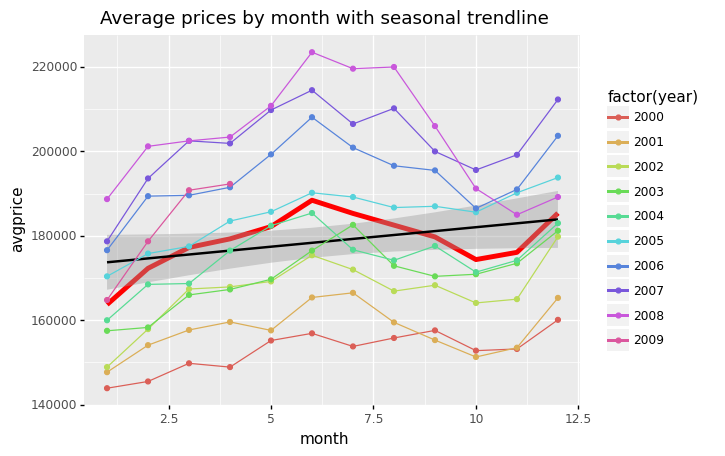

<ggplot: (98298624383)>

In [10]:
from plotnine import geom_smooth, stat_summary

avg = stat_summary(aes(group = 1), fun_y = np.mean, geom = "line", colour = "red", size = 2, na_rm = True) 

line = geom_smooth(aes(group = 1),method='lm')
ggplot(houston, aes('month', 'avgprice', group = 'year')) + avg + line + \
  ggtitle("Average prices by month with seasonal trendline") + \
  geom_line(aes(color = 'factor(year)')) + geom_point(aes(color = 'factor(year)'))

### Using linear models to get rid of obvious patterns
* We will use linear model to remove seasonal patterns. We don't care about the coefficients learned by the linear model, actually.
* We're just using it to subtract out the pattern

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

houses = pd.read_csv('data/tx-house-sales.csv')
houston = houses[houses['city'] == "Houston"].copy(deep=True)

model1 = smf.ols('avgprice ~ C(month)', data=houston).fit()
houston['avgprice_ds'] = model1.resid

model2 = smf.ols('onmarket ~ C(month)', data=houston).fit()
houston['onmarket_ds'] = model2.resid

model3 = smf.ols('sales ~ C(month)', data=houston).fit()
houston['sales_ds'] = model3.resid

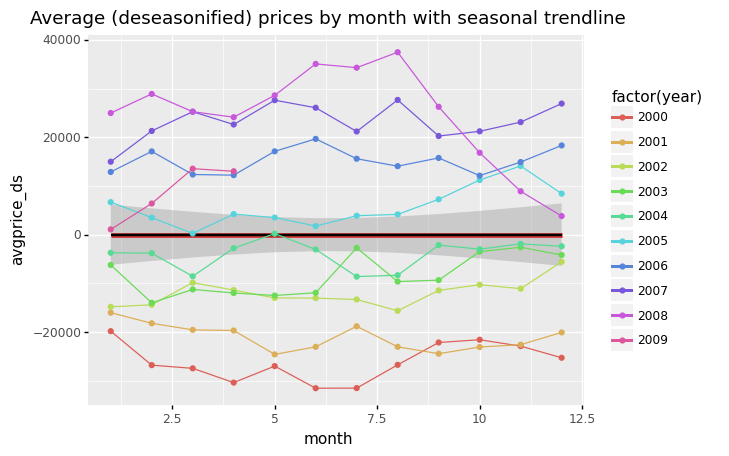

<ggplot: (98298721732)>

In [12]:
#Now lets recreate avg monthly prices with this deseasonified data

avg = stat_summary(aes(group = 1), fun_y = np.mean, geom = "line", colour = "red", size = 2, na_rm = True) 

line = geom_smooth(aes(group = 1),method='lm')
ggplot(houston, aes('month', 'avgprice_ds', group = 'year')) + avg + line + \
  ggtitle("Average (deseasonified) prices by month with seasonal trendline") + \
  geom_line(aes(color = 'factor(year)')) + geom_point(aes(color = 'factor(year)'))

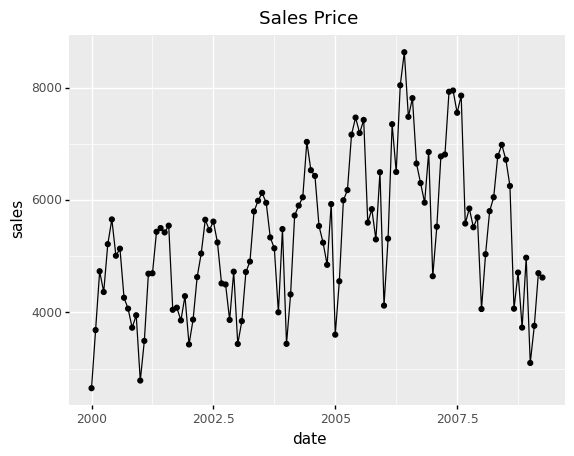

<ggplot: (98298595868)>

In [13]:
# Let's deseasonify everything
# Starting with sales
(ggplot(houston, aes('date', 'sales'))) + geom_point() + geom_line() \
+ ggtitle("Sales Price")

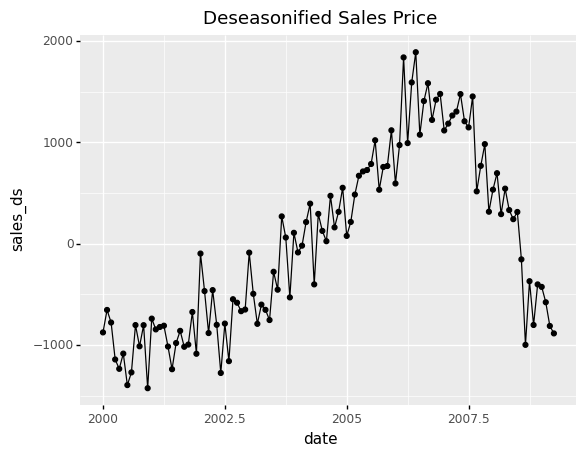

<ggplot: (98298613396)>

In [14]:
(ggplot(houston, aes('date', 'sales_ds'))) + geom_point() + geom_line() \
+ ggtitle("Deseasonified Sales Price")

## Summary: In short, we see that sales started slowing mid-2006, big drop mid-2008! Now let's look at how long houses stay on the market

/usr/local/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


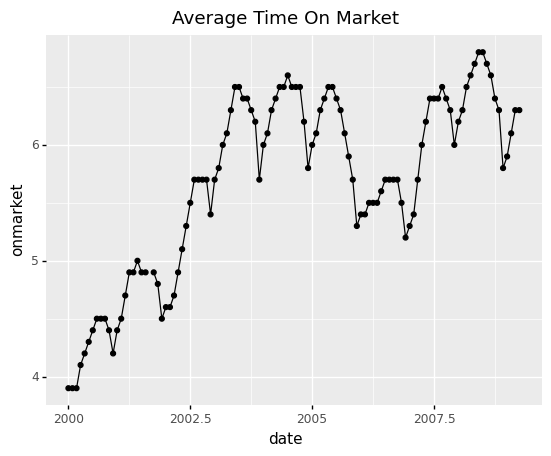

<ggplot: (317811282)>

In [36]:
(ggplot(houston, aes('date', 'onmarket'))) + geom_point() + geom_line() \
+ ggtitle("Average Time On Market")

/usr/local/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


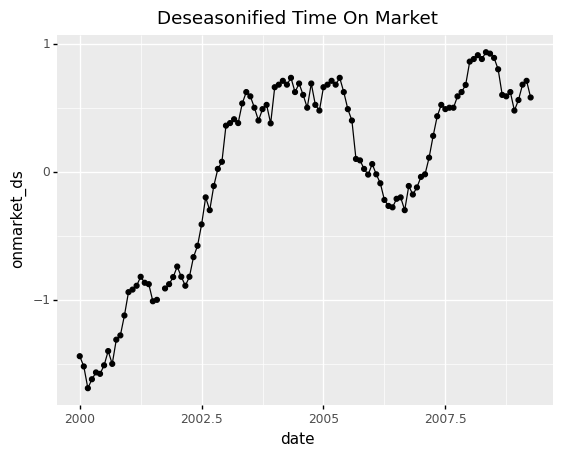

<ggplot: (319830525)>

In [37]:
(ggplot(houston, aes('date', 'onmarket_ds'))) + geom_point() + geom_line() \
+ ggtitle("Deseasonified Time On Market")

## Summary: House listings begin slowing at the start of 2006. Hoow would these two affect housing prices? Let's look at that next

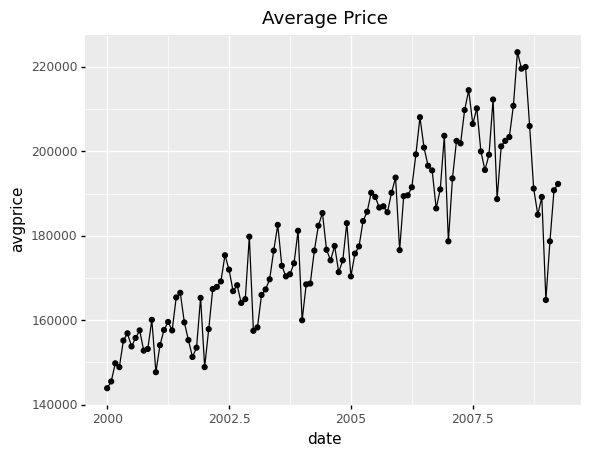

<ggplot: (319764237)>

In [38]:
(ggplot(houston, aes('date', 'avgprice'))) + geom_point() + geom_line() \
+ ggtitle("Average Price")

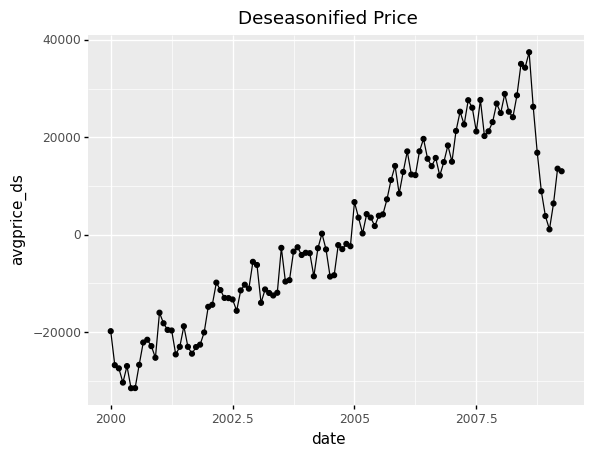

<ggplot: (319899868)>

In [39]:
(ggplot(houston, aes('date', 'avgprice_ds'))) + geom_point() + geom_line() \
+ ggtitle("Deseasonified Price")

## Summary: Average price took big hit in mid-late 2008!

# Examples of hypotheses from exploratory analysis!

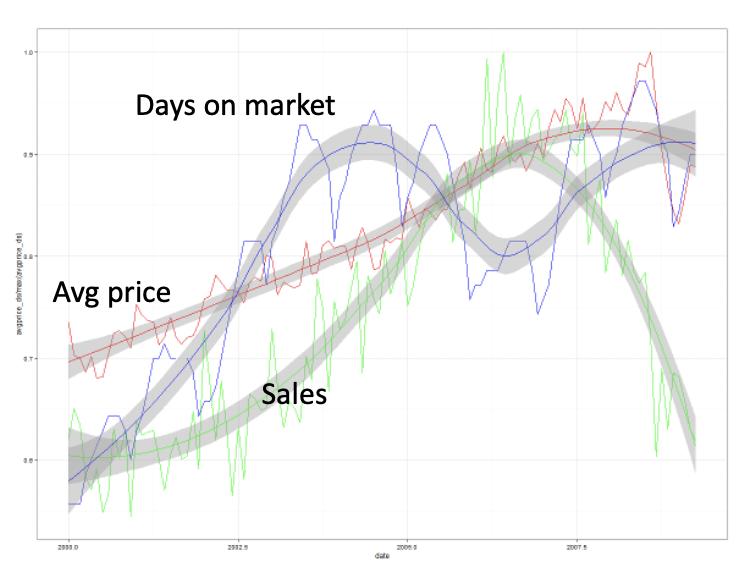


* Number of sales falling and days on market increasingbecause people uncertain about buying a new house. 

* Avg price not falling as rapidlybecause people now overvalue their current home.  
* Eventually as house stays on market for longer (~6 mo), they drop the price in an effort to sell.


## Remember that there are other cities in this dataset. Let's plot other cities 

/usr/local/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 366 rows containing missing values.


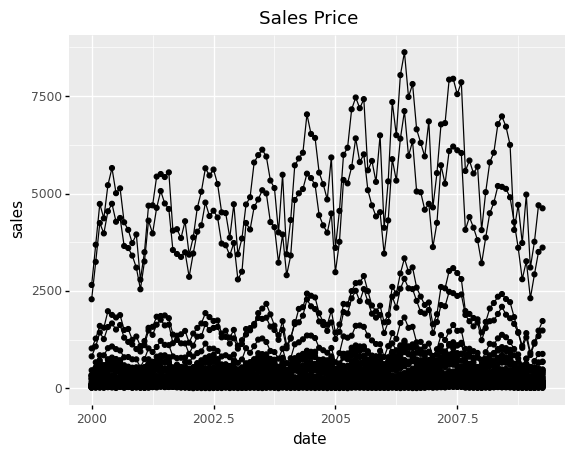

<ggplot: (319933175)>

In [40]:
houses = pd.read_csv('data/tx-house-sales.csv')
(ggplot(houses, aes('date', 'sales', group='city'))) + geom_point() + geom_line() \
+ ggtitle("Sales Price")

#### <font color="magenta">To-do at home/additional exercises: 1. Deseasonify all cities and re-plot the plot above with those values. 2. Use log-scaling so you can see the other cities with fewer sales 